# Revising Deep Learning Methods in Parking Lot Occupancy Detection

The dataset for this project has been collected, including images that represent the real-world scenarios and challenges faced in parking lot occupancy detection tasks.This project focuses on revising and improving existing deep learning techniques for parking lot occupancy detection. The project aims to improve the efficiency and the accuracy of these models to provide more reliable solutions for real-time parking management.

In [124]:
# Import necessary libraries
import os  # Required for file and directory operations
import cv2  # Utilized for image processing
import gdown  # Used for downloading the folder
import matplotlib.pyplot as plt  # Used for plotting
import numpy as np  # Required for numerical operations
import torch  # Essential for deep learning
import torch.nn as nn  # PyTorch's neural network module
import torch.optim as optim  # PyTorch's optimization module
import torchvision  # PyTorch's computer vision library
from torch.utils.data import DataLoader, TensorDataset  # PyTorch's data handling utilities


In [125]:
#Using the dataset 
file_url = "https://drive.google.com/drive/folders/1-2f5i30uQKDmeQukUuwNe8EnEj0LQ9SE"
# Define the destination file path
output_file = "Parking Lot"
# Download the file
gdown.download(file_url, output_file, quiet=False)


D:\March Work\Pytorch Project\myvenv\Lib\site-packages\gdown\parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1-2f5i30uQKDmeQukUuwNe8EnEj0LQ9SE
To: C:\Users\Admin\PROJECTS\Revising Deep Learning Methods in Parking Lot Occupancy Detection\Parking Lot
248kB [00:00, 2.15MB/s]


'Parking Lot'

In [126]:
# Define the path to the directory containing parking images
path = 'Parking Lot'
# List all the files (images) in the specified directory
images=os.listdir(path) 
# Check the type of the 'images' variable, it should be a list
type(images)  
#Determine the number of items in the 'images' list.
len(images)


205

<class 'list'>
Number of images: 205


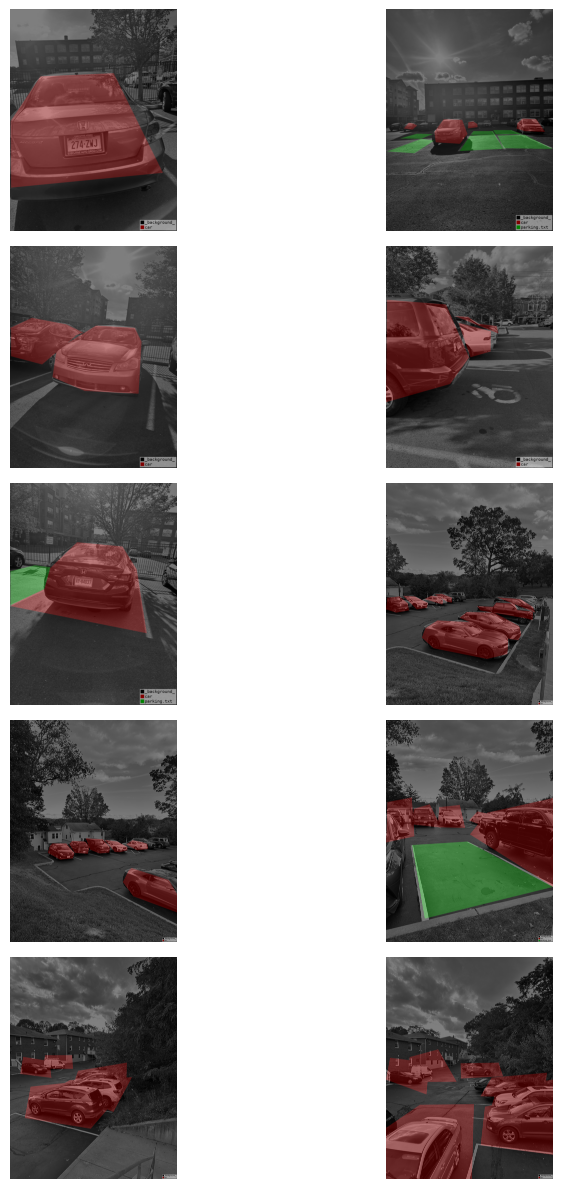

In [127]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing parking images
path = 'Parking Lot'

# List all the files (images) in the specified directory
images = os.listdir(path)

# Display the type of the 'images' variable, it should be a list
print(type(images))

# Determine the number of items in the 'images' list
num_images = len(images)
print(f"Number of images: {num_images}")

# View 10 images in a 5x2 grid
num_images_to_display = 10
rows = 5
cols = 2

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

# Iterate over the first 10 images and display them in the subplot
for i in range(num_images_to_display):
    # Define the full path to the image
    image_path = os.path.join(path, images[i])
    
    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // cols, i % cols].imshow(img)
    axes[i // cols, i % cols].axis('off')  # Turn off axis labels

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [128]:
#Create or Adapt a Custom Dataset Class
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = os.listdir(data_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

# Define data transformations and load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = CustomDataset(data_dir='Parking Lot', transform=transform)



In [129]:
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image

# Define and load your dataset
data_transforms = transforms.Compose([
    # Define your data transformations here, including resizing to a common size
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),
])

from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = [img for img in os.listdir(data_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

dataset = CustomDataset(data_dir='Parking Lot', transform=data_transforms)

# Print the dataset size for verification
print("Total dataset size:", len(dataset))

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

print("Train size:", train_size)
print("Validation size:", val_size)
print("Test size:", test_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


Total dataset size: 200
Train size: 160
Validation size: 20
Test size: 20


In [130]:
#normalize and augment your dataset 
from torchvision import transforms

# Define normalization and augmentation transformations
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize your images to a common size
    transforms.RandomHorizontalFlip(),  # Augmentation: Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Augmentation: Color jitter
    transforms.RandomRotation(15),  # Augmentation: Random rotation (adjust the degree)
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and standard deviation
])

augmented_dataset = CustomDataset(data_dir='Parking Lot', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


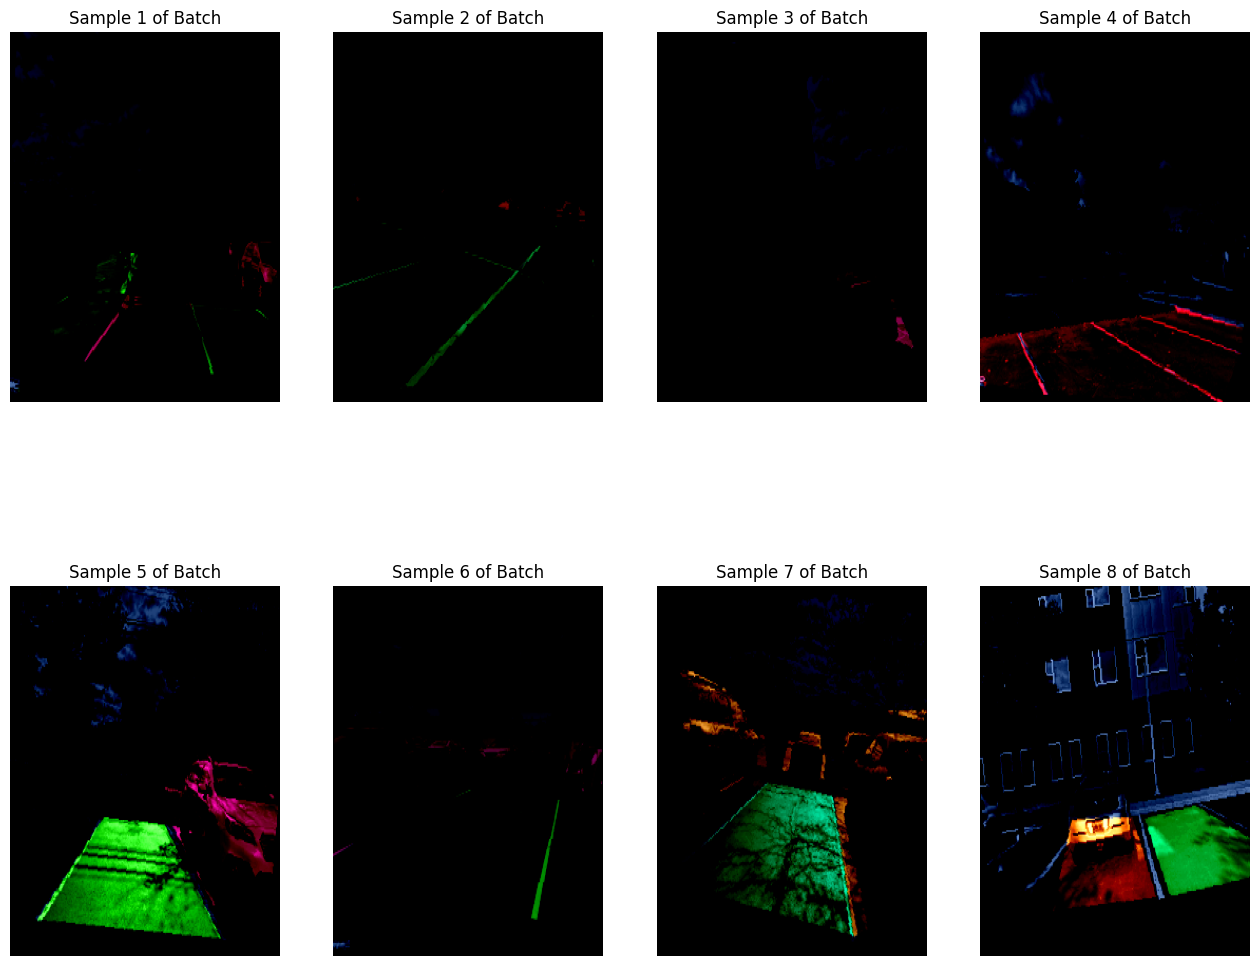

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from itertools import islice

# Define a function to create a grid of images with specified size
def plot_images_in_grid(images, titles, rows, cols, figsize=(20, 16), image_size=(8, 8)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.ravel()):
        if i < len(images):
            ax.imshow(images[i], aspect='auto')
            ax.set_title(titles[i])
            ax.axis('off')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

# Create a DataLoader for the augmented dataset
batch_size = 8
augmented_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

# Visualize the first sample of each minibatch in a 2x4 grid with larger images
sample_images = []
sample_titles = []
batch_iter = iter(augmented_loader)
for i, batch in enumerate(batch_iter, 1):
    first_sample = batch[0]
    first_sample = first_sample.permute(1, 2, 0).numpy()
    sample_images.append(first_sample)
    sample_titles.append(f'Sample {i} of Batch')
    if i >= 8:  # Visualize the first 8 minibatches
        break

plot_images_in_grid(sample_images, sample_titles, rows=2, cols=4, figsize=(16, 12), image_size=(10, 10))


In [132]:
from torch.utils.data import TensorDataset, DataLoader  # Import TensorDataset and DataLoader

# Define your model by subclassing nn.Module
class YourModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(YourModel, self).__init__()
        # Define your model architecture here
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Define the forward pass of your model
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the dimensions for your model
input_size = 64  # Adjust based on your data
hidden_size = 32  # Adjust based on your model design
output_size = 10  # Adjust based on the number of classes in your task

# Create an instance of your model
model = YourModel(input_size, hidden_size, output_size)

# Define your loss function (criterion)
criterion = nn.CrossEntropyLoss()  # Example: Cross-entropy loss for classification

# Define your optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Example: Stochastic Gradient Descent (SGD)

# Generate some example data and labels
# Replace this with your actual data and labels
num_samples = 100
input_data = torch.randn(num_samples, input_size)
labels = torch.randint(0, output_size, (num_samples,))

# Create a DataLoader for training
batch_size = 16
train_dataset = TensorDataset(input_data, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch in train_loader:
        inputs, targets = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()


In [133]:
# Print the loss for the first mini-batch
print("Loss for the first mini-batch:", loss.item())


Loss for the first mini-batch: 2.461526870727539


In [134]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image

# Define the path to the directory containing parking images
path = 'Parking Lot'

# Define normalization and resizing transformations
data_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a custom dataset class with the new transformations
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = [img for img in os.listdir(data_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)

        # Assuming the label is encoded in the image filename or directory
        label = 0 if "empty" in img_name.lower() else 1  # Adjust this based on your naming convention

        return image, label

# Create an instance of the custom dataset
preprocessed_dataset = CustomDataset(data_dir=path, transform=data_transforms)


In [135]:
# Load a pretrained ResNet18 model
pretrained_model = models.resnet18(pretrained=True)

# Update Two Analyis 
The steps includes;  
1. Data preprocessing 
2. Loading pretrained model parameters, 
3. Modifying the output layer, fine-tuning the model, 
4. Evaluating its performance on a test datas

In [136]:
# The output layer for binary classification
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 2)

# Define the learning rate and momentum (adjust these values)
learning_rate = 0.001
momentum = 0.9

# dataset into train, validation, and test sets
train_size = int(0.8 * len(preprocessed_dataset))
val_size = int(0.1 * len(preprocessed_dataset))
test_size = len(preprocessed_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(preprocessed_dataset, [train_size, val_size, test_size])

# DataLoader for training, validation, and test sets
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create a new optimizer with the updated model parameters
optimizer = optim.SGD(pretrained_model.parameters(), lr=learning_rate, momentum=momentum)

#loss function (criterion)
criterion = nn.CrossEntropyLoss()

# Train the model using the finetuning approach with validation for hyperparameter tuning
num_epochs = 10
for epoch in range(num_epochs):
    pretrained_model.train()
    for batch in train_loader:
        inputs, targets = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = pretrained_model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

    # Validation
    pretrained_model.eval()
    with torch.no_grad():
        val_correct = 0
        val_total = 0
        for val_batch in val_loader:
            val_inputs, val_targets = val_batch
            val_outputs = pretrained_model(val_inputs)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_targets.size(0)
            val_correct += (val_predicted == val_targets).sum().item()

    val_accuracy = val_correct / val_total
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_accuracy * 100:.2f}%')



Epoch [1/10], Validation Accuracy: 100.00%
Epoch [2/10], Validation Accuracy: 100.00%
Epoch [3/10], Validation Accuracy: 100.00%
Epoch [4/10], Validation Accuracy: 100.00%
Epoch [5/10], Validation Accuracy: 100.00%
Epoch [6/10], Validation Accuracy: 100.00%
Epoch [7/10], Validation Accuracy: 100.00%
Epoch [8/10], Validation Accuracy: 100.00%
Epoch [9/10], Validation Accuracy: 100.00%
Epoch [10/10], Validation Accuracy: 100.00%


In [137]:

# Create a new optimizer with the updated model parameters
optimizer = optim.SGD(pretrained_model.parameters(), lr=learning_rate, momentum=momentum)

# Define the loss function (MSE loss)
criterion = nn.MSELoss()

num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    pretrained_model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        targets = targets.float().view(-1, 1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Update training statistics
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    avg_train_loss = train_loss / train_total
    train_accuracy = train_correct / train_total

    # Validation phase
    pretrained_model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_batch in val_loader:
            val_inputs, val_targets = val_batch
            val_outputs = pretrained_model(val_inputs)
            val_targets = val_targets.float().view(-1, 1)
            val_loss += criterion(val_outputs, val_targets).item() * val_inputs.size(0)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_targets.size(0)
            val_correct += (val_predicted == val_targets).sum().item()

    avg_val_loss = val_loss / val_total
    val_accuracy = val_correct / val_total

    # Print and log results
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {avg_train_loss:.4f}'
          f'Validation Loss: {avg_val_loss:.4f}')

D:\March Work\Pytorch Project\myvenv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\March Work\Pytorch Project\myvenv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Train Loss: 10.7610Validation Loss: 548.7599
Epoch [2/10], Train Loss: 1.7941Validation Loss: 9.4977
Epoch [3/10], Train Loss: 0.3202Validation Loss: 1.8367
Epoch [4/10], Train Loss: 0.1373Validation Loss: 0.4191
Epoch [5/10], Train Loss: 0.0403Validation Loss: 0.2127
Epoch [6/10], Train Loss: 0.0305Validation Loss: 0.1488
Epoch [7/10], Train Loss: 0.0248Validation Loss: 0.0515
Epoch [8/10], Train Loss: 0.0189Validation Loss: 0.1340
Epoch [9/10], Train Loss: 0.0121Validation Loss: 0.1047
Epoch [10/10], Train Loss: 0.0187Validation Loss: 0.0529


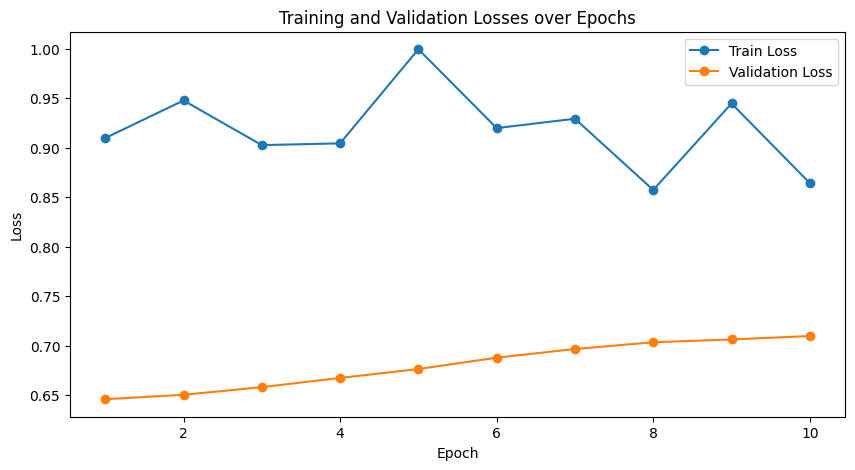

In [138]:
# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses over Epochs')
plt.legend()
plt.show()

In [139]:
# Evaluate the finetuned model on the test dataset
pretrained_model.eval()

test_loss = 0.0
test_samples = 0

with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = pretrained_model(inputs)
        targets = targets.float().view(-1, 1)
        test_loss += criterion(outputs, targets).item() * inputs.size(0)
        test_samples += inputs.size(0)

avg_test_loss = test_loss / test_samples
print(f'Test MSE: {avg_test_loss:.4f}')

Test MSE: 0.0257


# MIni Model

In [114]:
import torch
from torchsummary import summary
import torch.nn as nn

class RevisingParkingLot(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RevisingParkingLot, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, output_size)

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        return x

input_size = 64  
hidden_size = 32  
output_size = 1  

model = RevisingParkingLot(input_size, hidden_size, output_size)

summary(model, (input_size,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]           2,080
              ReLU-2                   [-1, 32]               0
            Linear-3                  [-1, 128]           4,224
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 16]             528
             ReLU-10                   [-1, 16]               0
           Linear-11                    [-1, 1]              17
Total params: 17,185
Trainable params: 17,185
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [116]:
# loss function (criterion)
criterion = nn.MSELoss()  

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)


num_samples = 100
input_data = torch.randn(num_samples, input_size)
labels = torch.randn(num_samples, output_size) 

batch_size = 16
train_dataset = TensorDataset(input_data, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Validation data
val_num_samples = 20
val_input_data = torch.randn(val_num_samples, input_size)
val_labels = torch.randn(val_num_samples, output_size)
val_dataset = TensorDataset(val_input_data, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training and validation loop with loss logging
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    total_train_loss = 0.0
    for batch in train_loader:
        inputs, targets = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        for val_batch in val_loader:
            val_inputs, val_targets = val_batch
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print the loss for every few epochs
    if epoch % 1 == 0:
        print(f'Epoch {epoch}, Train Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}')


Epoch 0, Avg Train Loss: 0.9099276917321342, Avg Val Loss: 0.6459993440657854
Epoch 1, Avg Train Loss: 0.9478731751441956, Avg Val Loss: 0.6504846829921007
Epoch 2, Avg Train Loss: 0.9027702254908425, Avg Val Loss: 0.658194076269865
Epoch 3, Avg Train Loss: 0.9045447622026715, Avg Val Loss: 0.667494535446167
Epoch 4, Avg Train Loss: 0.9996724511895861, Avg Val Loss: 0.6765211634337902
Epoch 5, Avg Train Loss: 0.9199920211519513, Avg Val Loss: 0.6879747435450554
Epoch 6, Avg Train Loss: 0.9294189470154899, Avg Val Loss: 0.6967339664697647
Epoch 7, Avg Train Loss: 0.8574639643941607, Avg Val Loss: 0.7035358026623726
Epoch 8, Avg Train Loss: 0.944833653313773, Avg Val Loss: 0.7064145803451538
Epoch 9, Avg Train Loss: 0.8643843191010612, Avg Val Loss: 0.7098317518830299


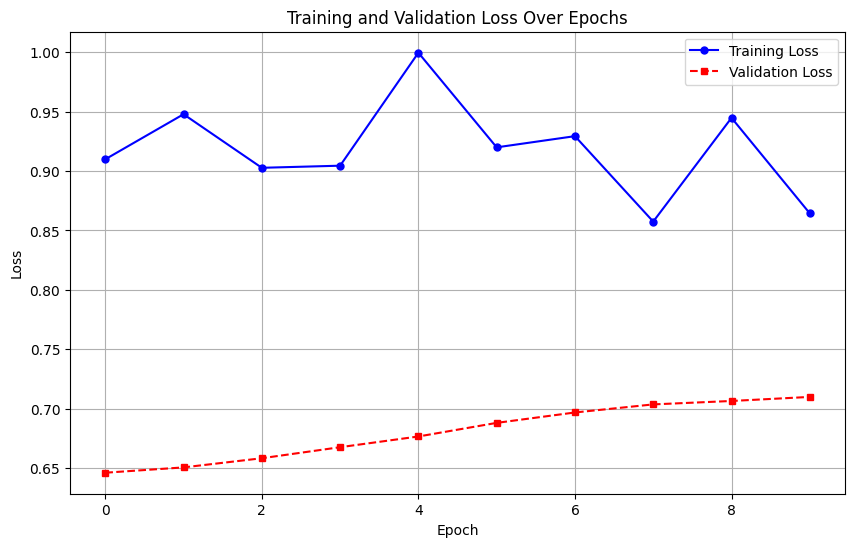

In [123]:
plt.figure(figsize=(10, 6))

plt.plot(train_losses, label='Training Loss', color='blue', linestyle='-', marker='o', markersize=5)

plt.plot(val_losses, label='Validation Loss', color='red', linestyle='--', marker='s', markersize=5)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [140]:

test_num_samples = 20
test_input_data = torch.randn(test_num_samples, input_size)
test_labels = torch.randn(test_num_samples, output_size)
test_dataset = TensorDataset(test_input_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test the model
model.eval()
total_test_loss = 0.0

with torch.no_grad():
    for test_batch in test_loader:
        test_inputs, test_targets = test_batch
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_targets)
        total_test_loss += test_loss.item()

avg_test_loss = total_test_loss / len(test_loader)
print(f'Average Test Loss: {avg_test_loss}')


Average Test Loss: 1.069538672765096
